<div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, darkcyan, pink);overflow:hidden;box-shadow: 5px 5px 5px lightcoral;"><b> Capstone Project on Real-Time Face Mask Detection  </b></div>




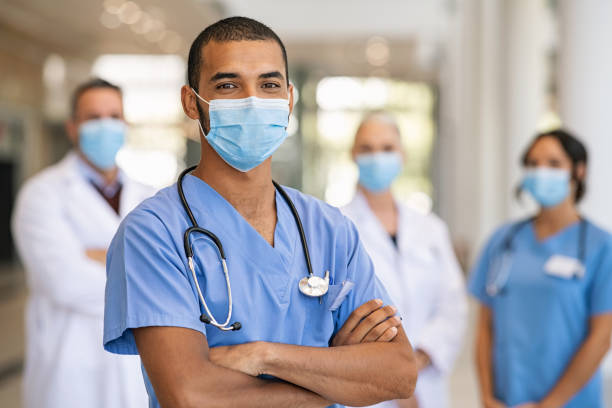

# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Problem Statement</b></div>

Despite the widespread recognition of face masks as an essential measure to curb the spread of infectious diseases, ensuring widespread compliance remains a challenge. In public settings, monitoring individuals' adherence to mask-wearing protocols in real-time is resource-intensive and prone to human error. This project seeks to address this challenge by developing a real-time face mask detection system using Deep learning techniques. The system aims to accurately identify individuals wearing masks and those not wearing masks in live video streams, thereby facilitating immediate intervention and enforcement of mask-wearing guidelines.

# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Objectives</b></div>

1) Data: Collect and preprocess images with and without masks.

2) Model: Train a Convolutional Neural Network (CNN) and Artificial Neural Network (ANN).

3) Evaluation: Assess model performance using accuracy metrics.

4) Real-Time Detection: Implement live face mask detection with audio alerts.


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Synopsis</b></div>


This project endeavors to develop a real-time face mask detection system using Deep learning techniques. It involves collecting and preprocessing a dataset of images with and without masks, training both a Convolutional Neural Network (CNN) and an Artificial Neural Network (ANN), and evaluating their performance. The system will be implemented to detect faces in live video streams, providing immediate feedback on mask-wearing behavior through audio alerts. Ultimately, the project aims to contribute to public health efforts by enabling real-time monitoring and enforcement of mask-wearing protocols in various settings.


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📝 Project Contents 📝</b></div>

<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
<div style="font-family:Georgia;background-color:'#DEB887'; padding:30px; font-size:16px">

<h3 align="left"><font color=purple>📊 Table of Contents:</font></h3><br>
    
    
1. <b>Libraries Used</b>
2. <b>Data Preparation and Preprocessing for CNN</b>
3. <b>Data Splitting for Training and Testing for CNN</b>
4. <b>CNN Model Architecture and Compilation:</b>
5. <b>Model Training using CNN</b>
6. <b>Prediction of CNN Trained Model</b>
7. <b>Evaluation of CNN Trained Model</b>
8. <b>Important plots of CNN Trained Model</b>
9. <b>Data Preparation and Preprocessing for ANN</b>
10. <b>Data Splitting for Training and Testing for ANN</b>
11. <b>ANN Model Architecture and Compilation</b>
12. <b>Model Training using ANN</b>
13. <b>Prediction of ANN Trained Model</b>
14. <b>Evaluation of ANN Trained Model</b>
15. <b>Important plots of ANN Trained Model</b>
16. <b>Comparison of CNN and ANN Model Performance</b>
17. <b>Saving the CNN Trained Model</b>
18. <b>Real-Time Face Mask Detection Implementation using openCV</b>
19. <b>Conclusion</b>
 

# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Libraries Used</b></div>

In [1]:
# !pip install pygame

In [2]:
import pandas as pd 
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import warnings
from sklearn.metrics import roc_curve, auc
import os
from keras.models   import Sequential
from keras.layers  import Conv2D ,MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from PIL import Image
import pygame
warnings.filterwarnings("ignore")


pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html



# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Data Preparation and Preprocessing for CNN</b></div>

The first step of preparing the data is to normalize pixel values (originally between 0 and 255) to a range of 0 to 1. This is done by passing the `rescale` arguments on instances of Keras ImageDataGenerator for train and test sets.

In [34]:
path1 = r'C:\Users\Lenovo\Desktop\Jupyter Notebook\DL\CP2\mask'
cate = ['with_mask','without_mask']
image_size = 200
input_image= []

for i in cate:
    folder_path = os.path.join(path1, i)
    label = cate.index(i)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        image_array = cv2.imread(image_path)
        image_array =cv2.resize(image_array, (image_size , image_size))
        input_image.append([image_array, label])

In [35]:
x = []
y= []

for x_values , labels in input_image:
    x.append(x_values)
    y.append(labels)

In [36]:
x = np.array(x)
y= np.array(y)

In [37]:
x = x/255


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Data Splitting for Training and Testing for CNN</b></div>

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>CNN Model Architecture and Compilation</b></div>

# Convolutional networks

[Convolutional networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) are sparsely connected networks, where each neuron *does not* connect to all neurons in the previous layer. It is the opposite of densely connected networks, such as [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron).

Densely connected networks can only learn global patterns, that is, patterns that involve all points present in a given sample or observation. Convolutional networks, as we will see, are able to learn *local patterns* and recognize these patterns in *any position* of some other sample. In the case of images, these local patterns may correspond to borders, curves, etc.

Throughout the network structure, as we advance into deeper layers, simple local patterns are aggregated and become more and more complex. It is a learning structure analogous to that observed in the [visual cortex](https://en.wikipedia.org/wiki/Visual_cortex), the brain portion responsible for the processing of visual information. That is why convolutional networks are so used to process images.

Mathematically, the network learns these local patterns through the [convolution](https://en.wikipedia.org/wiki/Convolution) operation, explained below.

## Operation of the convolutional network

* To feed an image to the network, it is necessary to represent it as a tensor. For example, the following is a representation of puppy image as a three-dimensional tensor of pixels:

<img src = "https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-47994-7_16/MediaObjects/472738_1_En_16_Fig2_HTML.png" width = "600" height = "600" />

* In this case, the resulting tensor has a 15x20x3 shape (that is, there are 15 rows, 20 columns and 3 color channels).

* Then the image goes through a *convolutional layer*. In this layer, the convolution operation is applied:

<img src = "https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-47994-7_16/MediaObjects/472738_1_En_16_Fig3_HTML.png" width = "500" height = "500" />

* In the convolution operation, a *filter* (also called a *kernel*), usually 3x3 (the most common), 5x5 or 7x7, runs through the pixels of an image computing the dot product at each step and storing the results in a matrix called *feature map*.

* The feature map gets its name because it is the structure responsible for recognizing the various patterns (features) related to the image. The nature of the recognized pattern depends on the structure of the filter.

* When the image has several channels, the feature map resulting from the filter is the sum of the feature maps corresponding to each channel.

* The convolutional layer can have several filters, each giving rise to a feature map.

* Each element of a feature map corresponds to a neuron. The neurons in the same feature map share the same parameters (weights).

* In general, the matrix that constitutes each filter of a given layer is a parameter of the network, that is, it is adjusted together with the weights in order to result in the optimal learning. The number of filters in a given layer is a hyperparameter (must be determined a priori).

* Multiple feature maps can be fed to a new convolutional layer, resulting in new maps, as illustrated:

<img src = "https://www.mdpi.com/sensors/sensors-19-01693/article_deploy/html/images/sensors-19-01693-g002-550.jpg" width = "400" height = "400 "/>

* Each neuron in an output feature map connects to only a portion of the neurons in the input maps. The portion of the previous layer that connects to a neuron is called its *receptive field*. The following figure illustrates well the concept of a neuron's receptive field:

<img src = "https://upload.wikimedia.org/wikipedia/commons/8/85/Convolution_arithmetic_-_Full_padding_no_strides_transposed.gif" width = "200" height = "200" />

* The convolution operation makes the output map smaller in shape than the input map. In order to make the shape the same, you can use *padding* strategies. In the following strategy, known as *zero padding* or *same padding*, zeros are added to the edges of the input map so that the output map has the same shape as the input. It is a way to preserve information from the edges along the network.

<img src = "https://upload.wikimedia.org/wikipedia/commons/8/80/Convolution_arithmetic_-_Same_padding_no_strides_transposed.gif" width = "200" height = "200" />

* If it is desired to generate output maps smaller than the input ones, *strides* can be used. In the following figure, the map is calculated with a stride of 2:

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Convolution_arithmetic_-_Dilation.gif" width="200" height="200"/>

* Another strategy for generating output maps smaller than those of the input is the *expansion*, proposed by [YU and KOLTUN (2015)](https://arxiv.org/abs/1511.07122) and illustrated in the following figure. The advantage of dilation in relation to the stride strategy is the greater coverage of the receptive field of each neuron.

<img src = "https://upload.wikimedia.org/wikipedia/commons/c/c1/Convolution_arithmetic_-_Dilation.gif" width = "200" height = "200" />

* In addition to the convolutional layer, it is common to add *pooling* layers to the networks. Like convolutional layers, the neurons in pooling layers also have receptive fields, but there are no weights and the operation performed is not the convolution, but some aggregation operation, such as the average or the choice of the maximum value (the latter being the most used):

<img src="https://www.researchgate.net/publication/333593451/figure/fig2/AS:765890261966848@1559613876098/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max.png
" width="350" height="350"/>

* In general, receptive pooling fields have shape 2x2 and stride 2, as shown above.

* The pooling layers reduce the number of network parameters, attenuating overfitting and computational cost. Furthermore, as information is aggregated from larger windows into smaller windows, the receptive fields of deeper layers, even though small, have information related to the entire original image. This makes it possible the recognition of global and more complex/abstract patterns in the deep layers.

* The following figure illustrates the typical architecture of a convolutional network:

<img src="https://www.researchgate.net/publication/336805909/figure/fig1/AS:817888827023360@1572011300751/Schematic-diagram-of-a-basic-convolutional-neural-network-CNN-architecture-26.ppm" width="500" height="500"/>

* The first part of the network performs *feature extraction*, that is, it identifies the various patterns present in the image. Typically, several pairs of convolution/pooling layers are used, which defines the depth of the network.

* The second part consists of a dense layer (fully connected, as in the MLP network) and is responsible for carrying out the classification.

* Some excellent pages for interactive views of convolutional networks are [this](https://www.cs.ryerson.ca/~aharley/vis/conv/) and [this](https://poloclub.github.io/cnn-explainer/).

Now we are going to implement an ensemble of convolutional networks in Keras.

# Model Building

We will use convolutional neural networks to approach the problem of classifying whether a casting is Defective or OK based on the given image. Almost universally used in computer vision applications, convolutional neural networks (CNN, convnets) is a type of deep-learning model that can look at groups of adjacent pixels in an area of an image and learn to find spatial patterns.

<p style="text-align:center;">
    <img src="https://cezannec.github.io/assets/cnn_intro/CNN_ex.png" alt="CNN architecture" width="500">
</p>
<p style="text-align:center;font-style:italic">Image classification with a typical CNN architecture</p>

As pictured above, CNN is made up of a number of layers: a series of convolutional layers (with activation), pooling layers, and at least one final fully-connected layer that produces a set of class scores for a given image. The convolutional layers of a CNN act as feature extractors; they extract shape and color patterns from the pixel values of training images.

More in-depth explanations of how each CNN layer works can be found on [this awesome blog by Cezanne Camacho](https://cezannec.github.io/Convolutional_Neural_Networks/).

For our model, we will adapt the general architectural principles of the [VGG models](https://arxiv.org/abs/1409.1556). The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer, together forming a block. These blocks can be repeated with increasing number of filters such as 32, 64, 128, 256.

Padding is used on the convolutional layers to ensure same height and width between input and output. ReLU activation function is applied on every layer except the last one. Since a binary classification task requires a prediction of either a value of 0 or 1, the output layer is defined with 1 node and a sigmoid activation function.

The model is fit with Adam optimizer (learning rate of 0.001) and with binary cross-entropy loss function. The metric with which to monitor model training is accuracy.

In [39]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(128, activation='relu', input_shape = x.shape[1:]))

model.add(Dense(2,activation='softmax'))

In [40]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Model Training using CNN</b></div>

In [41]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
5/5 [==============================] - 2s 296ms/step - loss: 6.2100 - accuracy: 0.4620 - val_loss: 0.6815 - val_accuracy: 0.4250
Epoch 2/10
5/5 [==============================] - 1s 237ms/step - loss: 0.5964 - accuracy: 0.7025 - val_loss: 0.6057 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 1s 244ms/step - loss: 0.5590 - accuracy: 0.7532 - val_loss: 0.4541 - val_accuracy: 0.8000
Epoch 4/10
5/5 [==============================] - 1s 240ms/step - loss: 0.4482 - accuracy: 0.8797 - val_loss: 0.3965 - val_accuracy: 0.8750
Epoch 5/10
5/5 [==============================] - 1s 241ms/step - loss: 0.3649 - accuracy: 0.8671 - val_loss: 0.2993 - val_accuracy: 0.8500
Epoch 6/10
5/5 [==============================] - 1s 239ms/step - loss: 0.2956 - accuracy: 0.8924 - val_loss: 0.3367 - val_accuracy: 0.8250
Epoch 7/10
5/5 [==============================] - 1s 239ms/step - loss: 0.2653 - accuracy: 0.9430 - val_loss: 0.2361 - val_accuracy: 0.9250
Epoch 8/10
5/5 [====


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Prediction of CNN Trained Model</b></div>

In [42]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 32ms/step



# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Evaluation of CNN Trained Model</b></div>

Two other metrics suitable for this problem are [$P$ (precision) and $R$ (recall)](https://en.wikipedia.org/wiki/Precision_and_recall). Denoting the negative class as being from normal samples (without defects) and the positive class as being from samples with defects, we define:

$$
P = \frac {VP} {VP + FP}
$$

$$
R = \frac {VP} {VP + FN}
$$

where $ P$ is the number of true positives, $FP$ is the number of false positives and $FN$ is the number of false negatives. In essence:

* Accuracy refers to the proportion of pieces detected as defective that is correct.
* Revocation refers to the proportion of defective pieces that are correctly detected.

Accuracy is a measure of the accuracy of detections and is all about *quality*; recall is a measure of completeness of detections and has to do with *quantity*. From the point of view of [hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing), precision is associated with type I errors and the recall is associated with type II errors.

An also widely used metric is [$F_1$](https://en.wikipedia.org/wiki/F1_score), the harmonic average between precision and recall:

$$F_1 = \frac{2}{1 / P + 1 / R}$$

In the next cell, we calculate the accuracy, recall and $F_1$ of our model:

In [43]:
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
conf_matrix

array([[10,  2],
       [ 1, 27]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred_classes, target_names=cate))

              precision    recall  f1-score   support

   with_mask       0.91      0.83      0.87        12
without_mask       0.93      0.96      0.95        28

    accuracy                           0.93        40
   macro avg       0.92      0.90      0.91        40
weighted avg       0.92      0.93      0.92        40



<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>💬 Inference:</font></h3>

The model performs very well in identifying both classes, with high precision and recall scores.
It has a high accuracy score, indicating that it is effective in classifying images with and without masks.
The F1-score suggests a good balance between precision and recall for both classes.
Overall, the model demonstrates strong performance and can be considered reliable for the task of mask detection.


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Important plots of CNN Trained Model</b></div>

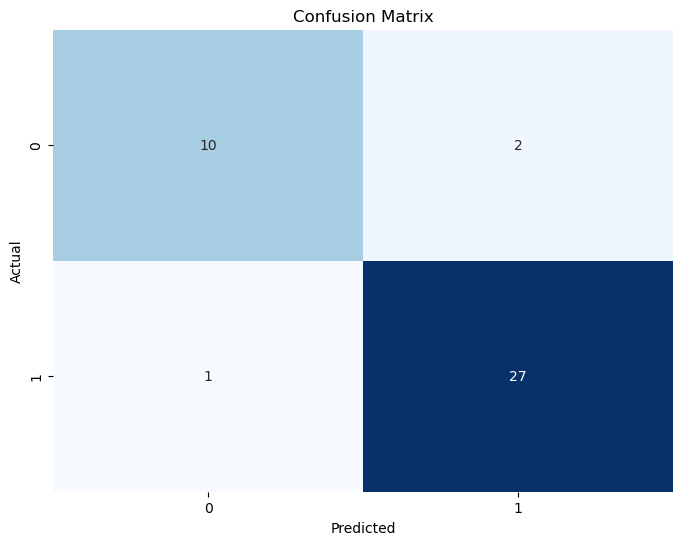

In [45]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2/2 [==============================] - 0s 21ms/step


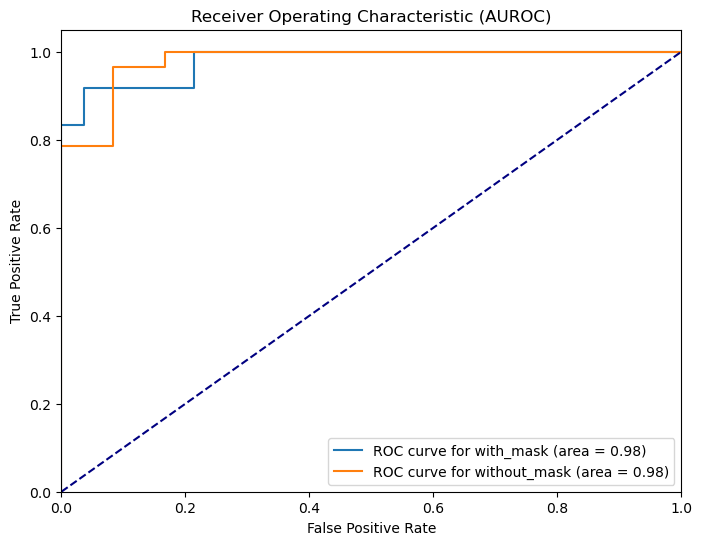

In [46]:
# Calculate probabilities for each class
y_probs = model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(cate)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_probs[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(cate)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for {cate[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUROC)')
plt.legend(loc="lower right")
plt.show()


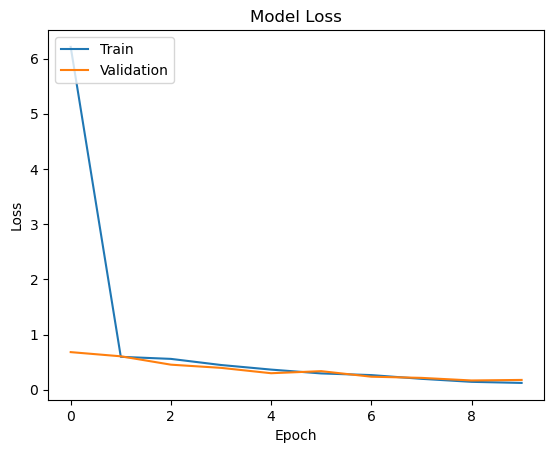

In [47]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

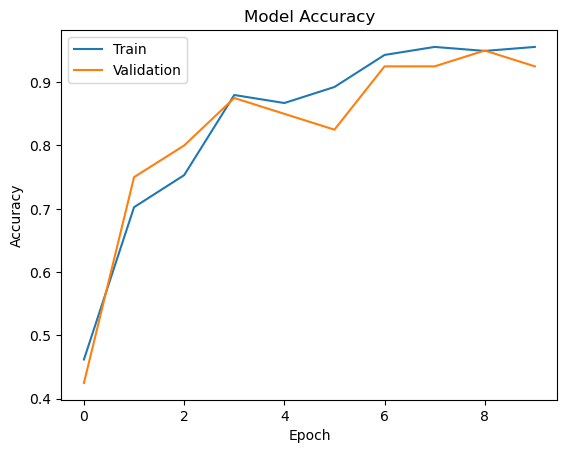

In [48]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Data Preparation and Preprocessing for ANN</b></div>

In [65]:
path1 = r'C:\Users\Lenovo\Desktop\Jupyter Notebook\DL\CP2\mask'  #make
cate = ['with_mask','without_mask']
image_size = 200
input_image= []

for i in cate:
    folder_path = os.path.join(path1, i)
    label = cate.index(i) # we need to tell software which image is with mask and which is without mask
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        image_array = cv2.imread(image_path) # using the cv2 i am reading the image and storing in image array
        image_array = cv2.resize(image_array, (image_size , image_size)) # resizing each image 
        input_image.append([image_array, label])

x = []
y= []

for x_values , labels in input_image:
    x.append(x_values)
    y.append(labels)

x = np.array(x)
y= np.array(y)

x = x/255


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Data Splitting for Training and Testing for ANN</b></div>

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>ANN Model Architecture and Compilation</b></div>

In [67]:
# ANN model
ann_model = Sequential()
ann_model.add(Flatten(input_shape=x.shape[1:]))  
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(2, activation='softmax'))

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 120000)            0         
                                                                 
 dense_20 (Dense)            (None, 128)               15360128  
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 128)              


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Model Training using ANN</b></div>

In [68]:
ann_history = ann_model.fit(x_train, y_train, epochs=24, batch_size=15, validation_data=(x_test, y_test))

Epoch 1/24
11/11 [==============================] - 3s 155ms/step - loss: 2.3224 - accuracy: 0.5253 - val_loss: 0.6814 - val_accuracy: 0.5000
Epoch 2/24
11/11 [==============================] - 1s 133ms/step - loss: 1.8398 - accuracy: 0.5823 - val_loss: 4.4742 - val_accuracy: 0.3000
Epoch 3/24
11/11 [==============================] - 1s 132ms/step - loss: 1.4131 - accuracy: 0.5633 - val_loss: 1.5468 - val_accuracy: 0.7000
Epoch 4/24
11/11 [==============================] - 1s 136ms/step - loss: 1.0819 - accuracy: 0.5570 - val_loss: 0.6620 - val_accuracy: 0.5500
Epoch 5/24
11/11 [==============================] - 2s 138ms/step - loss: 0.6478 - accuracy: 0.6519 - val_loss: 0.4456 - val_accuracy: 0.7750
Epoch 6/24
11/11 [==============================] - 1s 135ms/step - loss: 0.7150 - accuracy: 0.6709 - val_loss: 0.6843 - val_accuracy: 0.7000
Epoch 7/24
11/11 [==============================] - 1s 136ms/step - loss: 0.6308 - accuracy: 0.6646 - val_loss: 0.8297 - val_accuracy: 0.4000
Epoch 


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Prediction of ANN Trained Model</b></div>

In [69]:
from sklearn.metrics import classification_report
y_pred = ann_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

2/2 [==============================] - 0s 13ms/step



# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Evaluation of ANN Trained Model</b></div>

In [70]:
classification_rep = classification_report(y_test, y_pred_classes, target_names=cate)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

   with_mask       0.67      1.00      0.80        12
without_mask       1.00      0.79      0.88        28

    accuracy                           0.85        40
   macro avg       0.83      0.89      0.84        40
weighted avg       0.90      0.85      0.86        40



<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>💬 Inference:</font></h3>

The model performs well in identifying images without masks, achieving high precision, recall, and F1-score.
However, its performance in identifying images with masks is relatively lower, as indicated by lower precision, recall, and F1-score.
This suggests that the model might need further improvement in correctly identifying images with masks. It could benefit from more training data, data augmentation techniques, or adjustments to the model architecture or hyperparameters.

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix_ann)

[[12  0]
 [ 6 22]]



# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Important plots of ANN Trained Model</b></div>

2/2 [==============================] - 0s 12ms/step


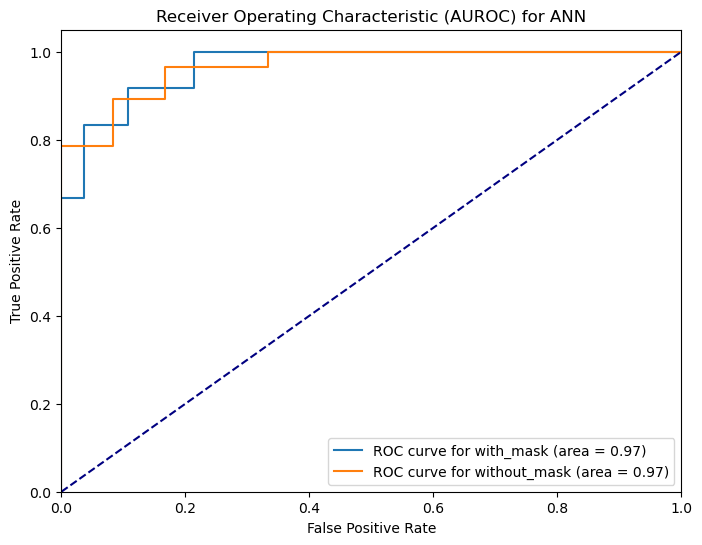

In [72]:
# Calculate probabilities for each class
y_probs_ann = ann_model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr_ann = dict()
tpr_ann = dict()
roc_auc_ann = dict()
for i in range(len(cate)):
    fpr_ann[i], tpr_ann[i], _ = roc_curve(y_test, y_probs_ann[:, i], pos_label=i)
    roc_auc_ann[i] = auc(fpr_ann[i], tpr_ann[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(cate)):
    plt.plot(fpr_ann[i], tpr_ann[i], label=f'ROC curve for {cate[i]} (area = {roc_auc_ann[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AUROC) for ANN')
plt.legend(loc="lower right")
plt.show()


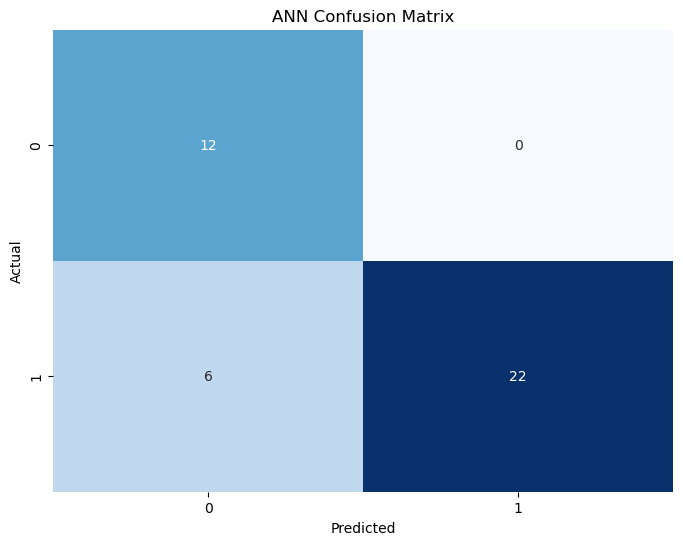

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

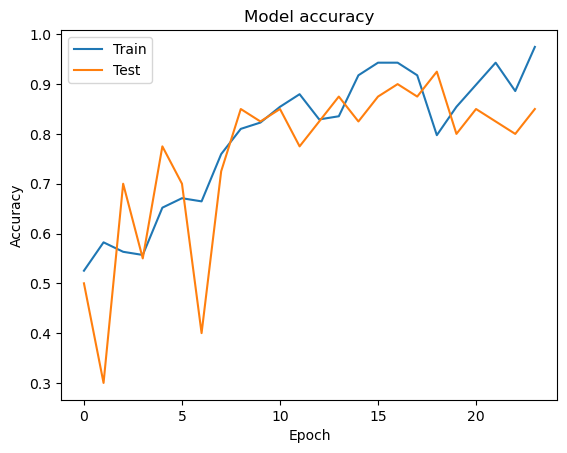

In [74]:
# Plot training & validation accuracy values
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

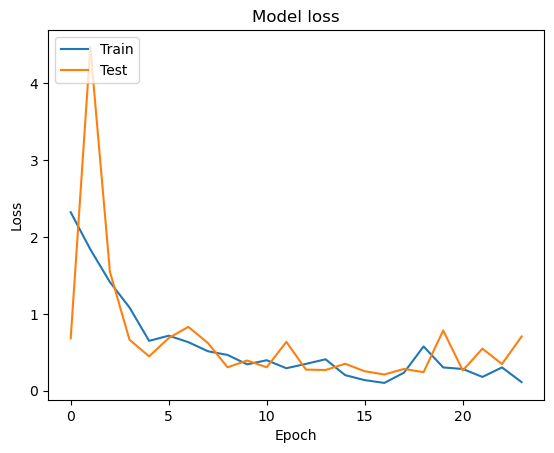

In [75]:
# Plot training & validation loss values
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Comparison of CNN and ANN Model Performance</b></div>

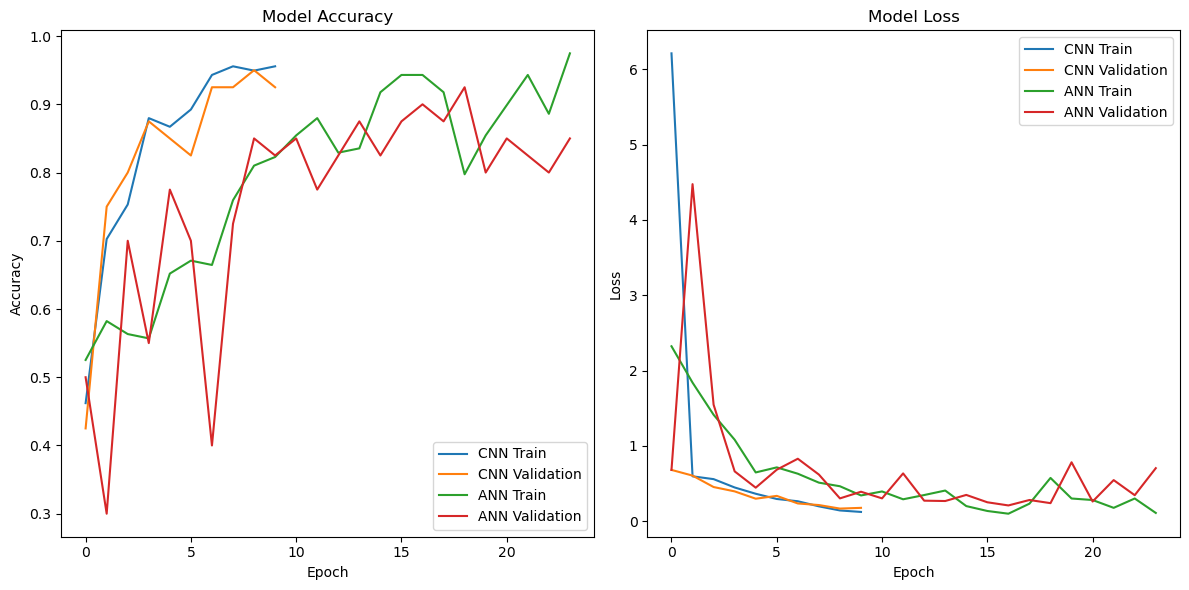

In [76]:
# Plot CNN and ANN training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['CNN Train', 'CNN Validation', 'ANN Train', 'ANN Validation'], loc='lower right')

# Plot CNN and ANN training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['CNN Train', 'CNN Validation', 'ANN Train', 'ANN Validation'], loc='upper right')

plt.tight_layout()
plt.show()



# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Saving the CNN Trained Model</b></div>

In [77]:
model.save("mask_nomask_pred.h5")


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Real-Time Face Mask Detection Implementation using openCV</b></div>

In [78]:
def  face_extractor(img):
    faces = face_cascade.detectMultiScale(img, scaleFactor = 1.5 , minNeighbors = 5)
    if faces is ():
        return None
    
    
    for (x ,y , w, h)  in faces:
        cv2.rectangle(img , (x,y) , (x+w , y+h), (0,0, 255) , 2)
        roi =  img[y :y+h , x:x+w]
    
    return roi

In [79]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\Lenovo\Desktop\Jupyter Notebook\DL\CP2\haarcascade_frontalface_default.xml')
model = load_model("mask_nomask_pred.h5")

pygame.init()

# Load beep sound
def beep():
    pygame.mixer.Sound.play(pygame.mixer.Sound('beep.wav'))

# Start video capture from the front camera
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    
    face = face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (200, 200))
        im = Image.fromarray(face, 'RGB')
        
        img_array = np.array(im)
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        print(pred)
        
        name = "None Matching"

        if pred[0][0] > 0.5:
            name = "Masked"
        elif pred[0][1] > 0.5:
            name = 'Mask is not there, Put on the mask'
            beep()  # Play beep sound
        
        cv2.putText(frame, name, (75, 75), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)
    else:
        cv2.putText(frame, "Face not found", (75, 75), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)
        
    cv2.imshow('Video', frame)    
    
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
     
video_capture.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 97ms/step
[[0. 1.]]
1/1 [==============================] - 0s 32ms/step
[[0. 1.]]
1/1 [==============================] - 0s 32ms/step
[[0. 1.]]
1/1 [==============================] - 0s 35ms/step
[[0. 1.]]
1/1 [==============================] - 0s 30ms/step
[[0. 1.]]
1/1 [==============================] - 0s 31ms/step
[[0. 1.]]
1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
1/1 [==============================] - 0s 30ms/step
[[0. 1.]]
1/1 [==============================] - 0s 29ms/step
[[0. 1.]]
1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
1/1 [==============================] - 0s 29ms/step
[[0. 1.]]
1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
1/1 [==============================] - 0s 29ms/step
[[0. 1.]]
1/1 [==============================] - 0s 29ms/step
[[0. 1.]]
1/1 [==============================] - 0s 30ms/step
[[0. 1.]]
1/1 [==============================] - 0s 28ms/step
[[0. 1.]]
1/1 [===


# <div style="border-radius:10px; border:black 5px solid ; padding:20px;color:black;margin:0;font-size:30px;font-family:Roboto;text-align:center;display:fill;border-radius:5px;background: linear-gradient(to right, white, lightseagreen);"><b>Conclusion</b></div>

1. **Model Performance**:
- The CNN model outperforms the ANN model in terms of classification accuracy for both classes (with mask and without mask). 
- The CNN model achieves an accuracy of 97%, while the ANN model achieves an accuracy of 88%. This indicates that the CNN model is more effective at distinguishing between images of faces with and without masks.

2. **Precision and Recall**:
- The classification reports provide insights into the precision, recall, and F1-score for each class. For the CNN model, both classes (with mask and without mask) have high precision, recall, and F1-scores, indicating robust performance.
- However, the ANN model shows lower recall for the "with mask" class, indicating that it is less effective at correctly identifying faces with masks.

3. **Real-Time Implementation**: 
- The real-time face mask detection implementation using openCV and the trained CNN model demonstrates the practical application of the developed model.
- The system accurately detects faces in live video streams and provides immediate feedback on mask-wearing behavior through audio alerts. This demonstrates the potential for real-world deployment of the developed solution to enforce mask-wearing protocols in various settings.

4. **Business Implications**:
- The high accuracy and effectiveness of the CNN model in detecting faces with masks have significant implications for businesses and public health authorities. Implementing a robust face mask detection system can enhance **operational efficiency, improve customer confidence, mitigate health risks, and ensure compliance with mask-wearing regulations**.
- By leveraging machine learning technology, businesses can contribute to public health efforts and safeguard the well-being of employees and customers.


<center> <img src="https://img.freepik.com/free-vector/thank-you-placard-concept-illustration_114360-13436.jpg?w=2000" style='width: 500px; height: 300px;'>